In [96]:
# INSTALLATION
# pip install pipwin
# pipwin install gdal
# pipwin install fiona
# pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt

#pipwin install cartopy
#pip install geoplot
import geoplot

import folium ##interactive maps

In [97]:
# Load NYC Boro Data
path_to_data = gpd.datasets.get_path("nybb")
gdf = gpd.read_file(path_to_data)
collisions = gpd.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   BoroCode    5 non-null      int64   
 1   BoroName    5 non-null      object  
 2   Shape_Leng  5 non-null      float64 
 3   Shape_Area  5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 328.0+ bytes


In [98]:
# Set BoroName as an Index
gdf = gdf.set_index("BoroName")
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


# Basics

In [99]:
# Find the area of each boro
## This is possible due to the geometry column, and fr any polyon/multiploygon geometries
gdf.geometry.area

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
dtype: float64

In [100]:
# Polygon boundary
print(gdf.boundary)

print("")

# Centroid
print(gdf.centroid)

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
dtype: geometry

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
dtype: geometry


In [53]:
# Distance between Queens and other boros
queens_center = gdf.centroid.loc["Queens"]
gdf["dist_to_queens"] = gdf.centroid.distance(queens_center)
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,dist_to_queens
BoroName,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",103781.535276
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",0.000000
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",42530.453904
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",48401.272479
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",54495.374959


In [54]:
print(f"Mean distance {gdf['dist_to_queens'].mean()} ")

Mean distance 49841.727323648636 


# Coordinate System

In [101]:
# View CRS info
gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [102]:
# project the geometry to a geographic coordinate system
# Use WGS 84 (epsg:4326) as the geographic coordinate system
gdf = gdf.to_crs(epsg=4326)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plotting

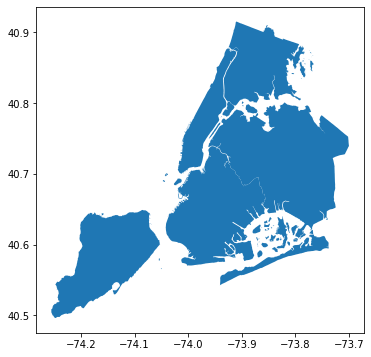

In [103]:
gdf.plot(figsize=(6,6))
plt.show()

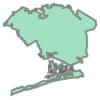

In [104]:
gdf.loc["Queens", 'geometry']

<AxesSubplot:>

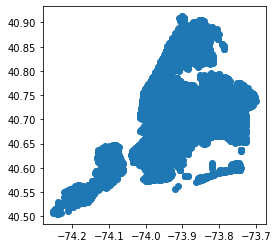

In [110]:
# the collisions df shows points in space where collisions occurred
collisions.plot()

<AxesSubplot:>

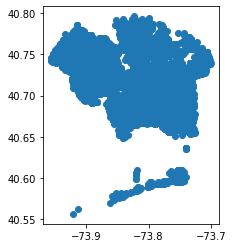

In [114]:
# Filter to Queens
collisions[collisions['BOROUGH'] == 'QUEENS'].plot()

## Geoplot

c:\Users\hanse\Documents\python\projects\python-ml\.venv\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


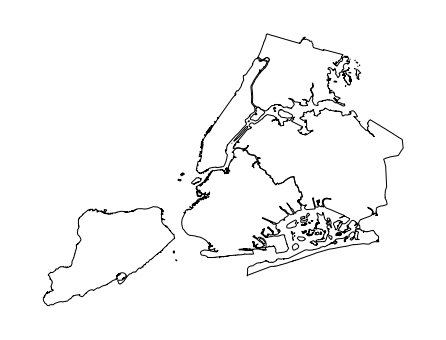

In [106]:
geoplot.polyplot(gdf)

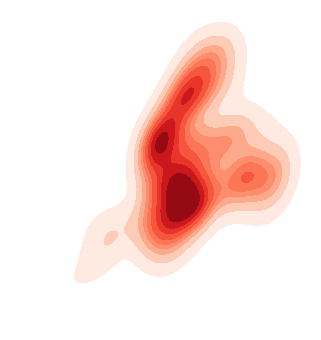

In [116]:
# Since we have points representing collisions, we can use a kernel density plot to show the density of collisions
ax = geoplot.kdeplot(
    collisions.head(1000),
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())

<GeoAxesSubplot:>

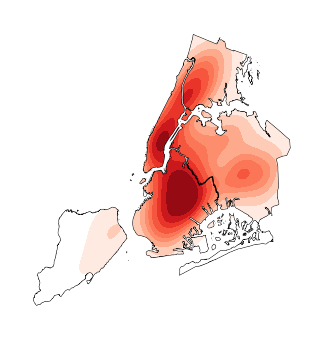

In [117]:
# We can clip the density plot based on the geometry of the boros (the gdf dataframe)
# and add the boro polyongs as outlines for a clean map
ax = geoplot.kdeplot(
    collisions.head(1000), clip=gdf.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(gdf, ax=ax, zorder=1)

## Folium map (interactive)

In [91]:
# Create base map
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')

In [77]:
gdf['name'] = gdf.index

In [92]:
# Add polygons 
from msvcrt import get_osfhandle


for _, r in gdf.iterrows():
    #simplify the representation of each boro
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor' : 'orange', 'opacity' : 0.5, 'weight' : 5} 
                            )
    folium.Popup(r['name']).add_to(geo_j)
    geo_j.add_to(m)

m

In [93]:
# Adding centroid markers
## First project data to a projected coordinate system to accuractetly calculate centroid
## Project to NAD83 projected crs
gdf = gdf.to_crs(epsg=2263)

## Access the centroid attribute of each polygon
gdf['centroid'] = gdf.centroid

## Now project back to a coord system with lat/lon values to work with Folium map
## Project to WGS84 geographic crs
### geometry (active) column
gdf = gdf.to_crs(epsg=4326)

### Centroid column
gdf['centroid'] = gdf['centroid'].to_crs(epsg=4326)

## Finally, add to map
for _, r in gdf.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat,lon],
                    popup='length: {} <br> area: {} <br>'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m

# Spatial Joins